# Convolutional Punk

In [1]:
from collections import defaultdict

import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import SubsetRandomSampler, DataLoader
from torchvision import transforms
import torchvision.transforms.functional as F

from torch.autograd import Variable   

In [2]:
import sys, os
sys.path.append(os.path.join(os.getcwd(), 'firepunks'))

from firepunks import datasets as DS

In [3]:
device = "cpu"

In [4]:
punk_transforms = transforms.Compose([
    transforms.ToTensor(),
])

punks_ds = DS.FirePunksDataset(DS.ALL_LABELS, test_size=2000, transform=punk_transforms)

train_sampler = SubsetRandomSampler(punks_ds.train_idx)
test_sampler = SubsetRandomSampler(punks_ds.test_idx)


batch_size = 32

train_loader = DataLoader(
    dataset=punks_ds, batch_size=batch_size, shuffle=False, sampler=train_sampler
)
test_loader = DataLoader(
    dataset=punks_ds, batch_size=batch_size, shuffle=False, sampler=test_sampler
)



In [5]:
ps = defaultdict(int)
for idx, (punk, label) in enumerate(train_loader):
    ps[idx] = punk

# last batch is 32
print(len(punk))


ps = defaultdict(int)
for idx, (punk, label) in enumerate(test_loader):
    ps[idx] = punk

# last batch is 16, giving total of 2000 items
print(len(punk))

32
16


In [6]:
print(torch.min(punk), torch.max(punk))
print(len(punk))
print(punk[0].shape)
print(len(punk[0][0][0]))
print(punk[0][0][0])

print(type(punk))

tensor(0.) tensor(1.)
16
torch.Size([3, 24, 24])
24
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.])
<class 'torch.Tensor'>


In [7]:
enc1 = nn.Conv2d(3, 32, 3, 1)
enc2 = nn.Conv2d(32, 64, 3, 1)
enc3 = nn.Conv2d(64, 64, 3, 1)
enc4 = nn.Conv2d(64, 64, 3, 1)

x = enc1(punk[0])
x = nn.LeakyReLU()(x)
print(x.shape)

x = enc2(x)
x = nn.LeakyReLU()(x)
print(x.shape)

x = enc3(x)
x = nn.LeakyReLU()(x)
print(x.shape)

x = enc4(x)
# x = nn.LeakyReLU()(x)
print(x.shape)

torch.Size([32, 22, 22])
torch.Size([64, 20, 20])
torch.Size([64, 18, 18])
torch.Size([64, 16, 16])


In [8]:
dec1 = nn.Conv2d(64, 64, 3, 1)
dec2 = nn.Conv2d(64, 64, 3, 1)
dec3 = nn.Conv2d(64, 32, 3, 1)
dec4 = nn.Conv2d(32, 3, 3, 1)

x = dec1(x)
x = nn.LeakyReLU()(x)
print(x.shape)

x = dec2(x)
x = nn.LeakyReLU()(x)
print(x.shape)

x = dec3(x)
x = nn.LeakyReLU()(x)
print(x.shape)

x = dec4(x)
# x = nn.LeakyReLU()(x)
print(x.shape)

torch.Size([64, 14, 14])
torch.Size([64, 12, 12])
torch.Size([32, 10, 10])
torch.Size([3, 8, 8])


In [9]:
# # From cpunks
# # enc_conv_filters = [32, 64, 64, 64]
# # enc_conv_kernel_size = [3, 3, 3, 3]
# # enc_conv_strides = [1, 2, 2, 1]

encoder = nn.Sequential(
    nn.Conv2d(3, 32, 3, 1),
    nn.LeakyReLU(),
    nn.Conv2d(32, 64, 3, 1),
    nn.LeakyReLU(),
    nn.Conv2d(64, 64, 3, 1),
    nn.LeakyReLU(),
    nn.Conv2d(64, 64, 3, 1),
)

encoder(punk[0])

tensor([[[-8.6649e-03, -8.5657e-03, -9.2760e-03,  ..., -1.1597e-02,
          -9.1313e-03, -8.5078e-03],
         [-8.5657e-03, -7.4776e-03,  1.9017e-03,  ..., -7.8822e-03,
          -1.0985e-02, -9.1313e-03],
         [-5.1876e-03,  3.5529e-04, -7.1492e-03,  ..., -1.0101e-02,
          -8.9287e-03, -9.7157e-03],
         ...,
         [-1.0141e-03,  4.9966e-03, -1.6627e-02,  ...,  2.3778e-03,
          -1.9424e-02, -2.9492e-03],
         [-8.3288e-03,  5.3865e-03, -2.1622e-02,  ...,  1.6502e-03,
          -2.0163e-02, -1.8532e-03],
         [ 2.2068e-04,  2.9424e-03, -5.4420e-04,  ...,  2.7547e-03,
          -2.2221e-02,  4.7521e-03]],

        [[-4.1552e-03, -6.0568e-03, -2.4519e-03,  ..., -3.7183e-03,
          -3.7689e-04, -3.8203e-03],
         [-6.0568e-03, -2.5609e-03, -1.2341e-03,  ..., -2.7348e-03,
          -3.8168e-03, -3.7689e-04],
         [-5.6770e-03, -1.7189e-03, -8.7879e-03,  ..., -2.1084e-03,
          -7.7528e-04, -4.7131e-03],
         ...,
         [ 2.0791e-03,  3

In [10]:
# # From cpunks
# # dec_conv_t_filters = [64, 64, 32, 4]
# # dec_conv_t_kernel_size = [3, 3, 3, 3]
# # dec_conv_t_strides = [1, 2, 2, 1]

decoder = nn.Sequential(
    nn.ConvTranspose2d(64, 64, 3, 1),
    nn.LeakyReLU(),
    nn.ConvTranspose2d(64, 64, 3, 1),
    nn.LeakyReLU(),
    nn.ConvTranspose2d(64, 32, 3, 1),
    nn.LeakyReLU(),
    nn.ConvTranspose2d(32, 3, 3, 1),
    nn.Sigmoid(),
)

decoder(encoder(punk[0]))

tensor([[[0.5082, 0.5050, 0.5043,  ..., 0.5035, 0.4997, 0.5032],
         [0.5062, 0.5028, 0.4930,  ..., 0.4943, 0.4900, 0.4914],
         [0.5074, 0.5013, 0.4954,  ..., 0.5007, 0.4910, 0.4944],
         ...,
         [0.5075, 0.5023, 0.4943,  ..., 0.4951, 0.4912, 0.4972],
         [0.5040, 0.5027, 0.4921,  ..., 0.4921, 0.4946, 0.4970],
         [0.5062, 0.5019, 0.5031,  ..., 0.5042, 0.5033, 0.5076]],

        [[0.4975, 0.4997, 0.4953,  ..., 0.4943, 0.4961, 0.4928],
         [0.4948, 0.5023, 0.5012,  ..., 0.5011, 0.5057, 0.4960],
         [0.5070, 0.5223, 0.5225,  ..., 0.5186, 0.5159, 0.5001],
         ...,
         [0.5045, 0.5206, 0.5171,  ..., 0.5185, 0.5163, 0.5004],
         [0.5046, 0.5179, 0.5209,  ..., 0.5244, 0.5190, 0.5042],
         [0.5091, 0.5165, 0.5186,  ..., 0.5194, 0.5096, 0.5011]],

        [[0.4866, 0.4889, 0.4883,  ..., 0.4895, 0.4896, 0.4859],
         [0.4858, 0.4897, 0.4882,  ..., 0.4922, 0.4914, 0.4850],
         [0.4884, 0.5011, 0.5008,  ..., 0.5023, 0.4973, 0.

In [11]:

class VAE(nn.Module):
    def __init__(self, encoder, decoder):
        super(VAE, self).__init__()
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


model_vae = VAE(encoder, decoder)

In [12]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(
    model_vae.parameters(),
    lr=1e-3,
    weight_decay=1e-5
)

num_epochs = 10

train_losses = []


In [13]:
for epoch in range(1, num_epochs+1):
    batch_losses = []
    for inputs, _ in train_loader:
        model_vae.train()
        inputs = inputs.to(device)
        yhat = model_vae(inputs)
        loss = criterion(yhat, inputs) 
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        batch_losses.append(np.array([loss.data.item()]))

    # Average over batches
    train_losses.append(np.array(batch_losses).mean(axis=0))

    print(f'Epoch {epoch:03d} | Loss >> {train_losses[-1][0]:.4f}')

Epoch 001 | Loss >> 0.0304
Epoch 002 | Loss >> 0.0043
Epoch 003 | Loss >> 0.0021
Epoch 004 | Loss >> 0.0014
Epoch 005 | Loss >> 0.0011
Epoch 006 | Loss >> 0.0010
Epoch 007 | Loss >> 0.0010
Epoch 008 | Loss >> 0.0007
Epoch 009 | Loss >> 0.0007
Epoch 010 | Loss >> 0.0006


In [14]:
tpunk, _ = next(iter(test_loader))
tpunk = tpunk[1]

In [15]:
print(tpunk.shape)
vpunk = Variable(tpunk)
guess = model_vae(vpunk)

torch.Size([3, 24, 24])


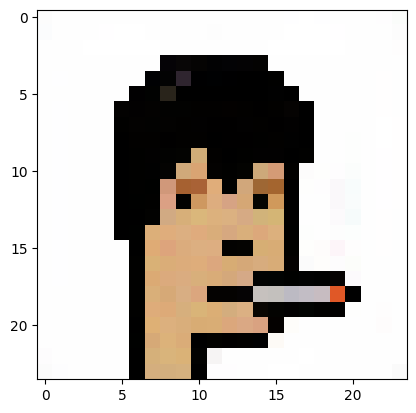

In [16]:
plt.imshow(F.to_pil_image(guess))